<a href="https://colab.research.google.com/github/shumshersubashgautam/Bird_Sound_Classify_Neural_Network/blob/main/Bird_Sound_Classification_EDA_BirdCLEF2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install -q kaggle

In [15]:
from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shumshersubash2018","key":"f147ab838df934330c5631a31b26bec8"}'}

In [16]:
!mkdir ~/.kaggle

In [17]:
!cp kaggle.json ~/.kaggle/

In [18]:
 !chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle competitions download -c birdclef-2023

100% 4.91G/4.91G [02:26<00:00, 37.2MB/s]
100% 4.91G/4.91G [02:26<00:00, 36.1MB/s]


In [20]:
!mkdir bird

In [21]:
!unzip birdclef-2023.zip -d bird

Streaming output truncated to the last 5000 lines.
  inflating: bird/train_audio/rerswa1/XC330427.ogg  
  inflating: bird/train_audio/rerswa1/XC330925.ogg  
  inflating: bird/train_audio/rerswa1/XC331732.ogg  
  inflating: bird/train_audio/rerswa1/XC333007.ogg  
  inflating: bird/train_audio/rerswa1/XC333008.ogg  
  inflating: bird/train_audio/rerswa1/XC333855.ogg  
  inflating: bird/train_audio/rerswa1/XC334159.ogg  
  inflating: bird/train_audio/rerswa1/XC334160.ogg  
  inflating: bird/train_audio/rerswa1/XC334161.ogg  
  inflating: bird/train_audio/rerswa1/XC370598.ogg  
  inflating: bird/train_audio/rerswa1/XC371021.ogg  
  inflating: bird/train_audio/rerswa1/XC371367.ogg  
  inflating: bird/train_audio/rerswa1/XC376096.ogg  
  inflating: bird/train_audio/rerswa1/XC379520.ogg  
  inflating: bird/train_audio/rerswa1/XC381917.ogg  
  inflating: bird/train_audio/rerswa1/XC382091.ogg  
  inflating: bird/train_audio/rerswa1/XC383377.ogg  
  inflating: bird/train_audio/rerswa1/XC383401.o

In [22]:
import pandas as pd

df = pd.read_csv('/content/bird/train_metadata.csv')
df

primary_label secondary_labels              type  latitude  longitude  \
0           abethr1               []          ['song']    4.3906    38.2788   
1           abethr1               []          ['call']   -2.9524    38.2921   
2           abethr1               []          ['song']   -2.9524    38.2921   
3           abethr1               []          ['song']   -2.9524    38.2921   
4           abethr1               []  ['call', 'song']   -2.9524    38.2921   
...             ...              ...               ...       ...        ...   
16936       yewgre1               []              ['']   -1.2502    29.7971   
16937       yewgre1               []              ['']   -1.2489    29.7923   
16938       yewgre1               []              ['']   -1.2433    29.7844   
16939       yewgre1               []              ['']    0.0452    36.3699   
16940       yewgre1               []              ['']   -0.3986    37.3087   

            scientific_name                common_name          author  \
0        Turdus tephronotus   African Bare-eyed Thrush   Rolf A. de By   
1        Turdus tephronotus   African Bare-eyed Thrush   James Bradley   
2        Turdus tephronotus   African Bare-eyed Thrush   James Bradley   
3        Turdus tephronotus   African Bare-eyed Thrush   James Bradley   
4        Turdus tephronotus   African Bare-eyed Thrush   James Bradley   
...                     ...                        ...             ...   
16936  Eurillas latirostris  Yellow-whiskered Greenbul  András Schmidt   
16937  Eurillas latirostris  Yellow-whiskered Greenbul  András Schmidt   
16938  Eurillas latirostris  Yellow-whiskered Greenbul  András Schmidt   
16939  Eurillas latirostris  Yellow-whiskered Greenbul   Lars Lachmann   
16940  Eurillas latirostris  Yellow-whiskered Greenbul   Lars Lachmann   

                                                 license  rating  \
0      Creative Commons Attribution-NonCommercial-Sha...     4.0   
1      Creative Commons Attribution-NonCommercial-Sha...     3.5   
2      Creative Commons Attribution-NonCommercial-Sha...     3.5   
3      Creative Commons Attribution-NonCommercial-Sha...     5.0   
4      Creative Commons Attribution-NonCommercial-Sha...     4.5   
...                                                  ...     ...   
16936  Creative Commons Attribution-NonCommercial-Sha...     3.0   
16937  Creative Commons Attribution-NonCommercial-Sha...     4.0   
16938  Creative Commons Attribution-NonCommercial-Sha...     4.0   
16939  Creative Commons Attribution-NonCommercial-Sha...     4.0   
16940  Creative Commons Attribution-NonCommercial-Sha...     4.5   

                                     url              filename  
0      https://www.xeno-canto.org/128013  abethr1/XC128013.ogg  
1      https://www.xeno-canto.org/363501  abethr1/XC363501.ogg  
2      https://www.xeno-canto.org/363502  abethr1/XC363502.ogg  
3      https://www.xeno-canto.org/363503  abethr1/XC363503.ogg  
4      https://www.xeno-canto.org/363504  abethr1/XC363504.ogg  
...                                  ...                   ...  
16936      https://xeno-canto.org/703472  yewgre1/XC703472.ogg  
16937      https://xeno-canto.org/703485  yewgre1/XC703485.ogg  
16938      https://xeno-canto.org/704433  yewgre1/XC704433.ogg  
16939      https://xeno-canto.org/752974  yewgre1/XC752974.ogg  
16940      https://xeno-canto.org/753190  yewgre1/XC753190.ogg  

[16941 rows x 12 columns]

In [23]:
import plotly.express as px

primary_label_counts = df.primary_label.value_counts()

px.bar(
    x=primary_label_counts.keys(), 
    y=primary_label_counts.values,
    title="Distribution of primary labels",
    labels={"x": "bird", "y": "# of recordings"},
).show()

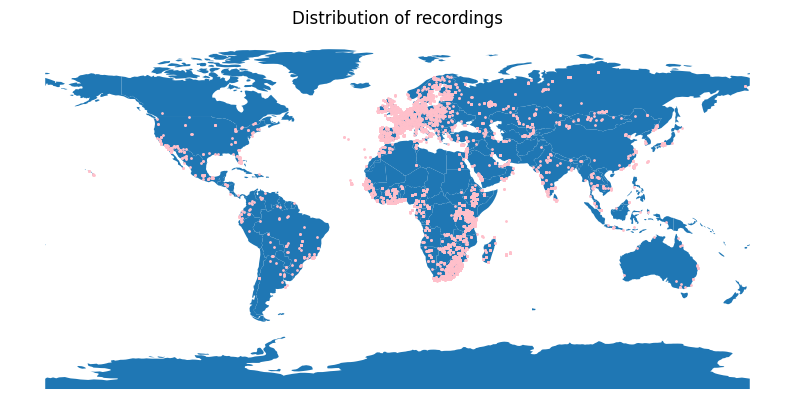

In [26]:
from shapely.geometry import Point
import geopandas as gpd

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
ax.set_axis_off()
ax.set_title('Distribution of recordings')
gdf.plot(ax=ax, marker='o', color='pink', markersize=1);

In [25]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.5 MB/s eta 0:00:00


In [27]:
kenya = world[world['name'] == 'Kenya']
kenya_poly = kenya['geometry'].item()
df['is_in_kenya'] = [kenya_poly.contains(p) for p in geometry]
kenya_df = df[df.is_in_kenya].reset_index()
kenya_df

/usr/local/lib/python3.9/dist-packages/shapely/predicates.py:540: RuntimeWarning:

invalid value encountered in contains



index primary_label secondary_labels  \
0         1       abethr1               []   
1         2       abethr1               []   
2         3       abethr1               []   
3         4       abethr1               []   
4         5       abethr1      ['rbsrob1']   
...     ...           ...              ...   
2493  16929       yewgre1               []   
2494  16932       yewgre1               []   
2495  16933       yewgre1               []   
2496  16939       yewgre1               []   
2497  16940       yewgre1               []   

                                    type  latitude  longitude  \
0                               ['call']   -2.9524    38.2921   
1                               ['song']   -2.9524    38.2921   
2                               ['song']   -2.9524    38.2921   
3                       ['call', 'song']   -2.9524    38.2921   
4                               ['song']   -2.9524    38.2921   
...                                  ...       ...        ...   
2493                      ['alarm call']    0.0697    35.6089   
2494  ['adult', 'sex uncertain', 'song']   -1.2474    36.8231   
2495  ['adult', 'sex uncertain', 'song']   -1.2474    36.8231   
2496                                ['']    0.0452    36.3699   
2497                                ['']   -0.3986    37.3087   

           scientific_name                common_name         author  \
0       Turdus tephronotus   African Bare-eyed Thrush  James Bradley   
1       Turdus tephronotus   African Bare-eyed Thrush  James Bradley   
2       Turdus tephronotus   African Bare-eyed Thrush  James Bradley   
3       Turdus tephronotus   African Bare-eyed Thrush  James Bradley   
4       Turdus tephronotus   African Bare-eyed Thrush  James Bradley   
...                    ...                        ...            ...   
2493  Eurillas latirostris  Yellow-whiskered Greenbul  James Bradley   
2494  Eurillas latirostris  Yellow-whiskered Greenbul   isaac kilusu   
2495  Eurillas latirostris  Yellow-whiskered Greenbul   isaac kilusu   
2496  Eurillas latirostris  Yellow-whiskered Greenbul  Lars Lachmann   
2497  Eurillas latirostris  Yellow-whiskered Greenbul  Lars Lachmann   

                                                license  rating  \
0     Creative Commons Attribution-NonCommercial-Sha...     3.5   
1     Creative Commons Attribution-NonCommercial-Sha...     3.5   
2     Creative Commons Attribution-NonCommercial-Sha...     5.0   
3     Creative Commons Attribution-NonCommercial-Sha...     4.5   
4     Creative Commons Attribution-NonCommercial-Sha...     3.5   
...                                                 ...     ...   
2493  Creative Commons Attribution-NonCommercial-Sha...     3.0   
2494  Creative Commons Attribution-NonCommercial-Sha...     3.0   
2495  Creative Commons Attribution-NonCommercial-Sha...     3.0   
2496  Creative Commons Attribution-NonCommercial-Sha...     4.0   
2497  Creative Commons Attribution-NonCommercial-Sha...     4.5   

                                    url              filename  \
0     https://www.xeno-canto.org/363501  abethr1/XC363501.ogg   
1     https://www.xeno-canto.org/363502  abethr1/XC363502.ogg   
2     https://www.xeno-canto.org/363503  abethr1/XC363503.ogg   
3     https://www.xeno-canto.org/363504  abethr1/XC363504.ogg   
4     https://www.xeno-canto.org/379322  abethr1/XC379322.ogg   
...                                 ...                   ...   
2493  https://www.xeno-canto.org/537944  yewgre1/XC537944.ogg   
2494       http://xeno-canto.org/675466  yewgre1/XC675466.ogg   
2495       http://xeno-canto.org/675467  yewgre1/XC675467.ogg   
2496      https://xeno-canto.org/752974  yewgre1/XC752974.ogg   
2497      https://xeno-canto.org/753190  yewgre1/XC753190.ogg   

                       geometry  is_in_kenya  
0     POINT (38.29210 -2.95240)         True  
1     POINT (38.29210 -2.95240)         True  
2     POINT (38.29210 -2.95240)         True  
3     POINT (38.29210 -2.95240)  

In [28]:
kenya_primary_label_counts = kenya_df.primary_label.value_counts()

px.bar(
    x=kenya_primary_label_counts.keys(), 
    y=kenya_primary_label_counts.values,
    title="Distribution of primary labels in kenya",
    labels={"x": "bird", "y": "# of recordings"},
).show()

kenya_primary_label_counts

gnbcam2    75
spmthr1    63
ratcis1    61
rbsrob1    51
trobou1    42
           ..
refwar2     1
rufcha2     1
blwlap1     1
strher      1
litegr      1
Name: primary_label, Length: 231, dtype: int64

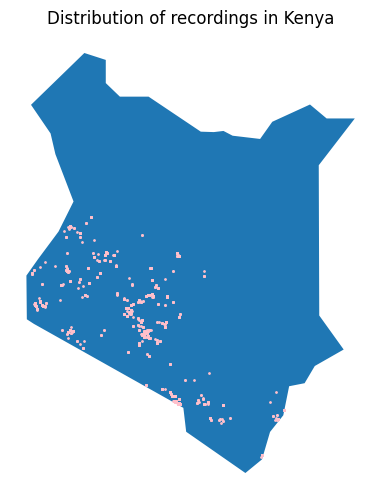

In [29]:
kenya_geometry = [Point(xy) for xy in zip(kenya_df['longitude'], kenya_df['latitude'])]
gdf = gpd.GeoDataFrame(kenya_df, geometry=kenya_geometry)
ax = kenya.plot(figsize=(10, 6))
ax.set_axis_off()
ax.set_title('Distribution of recordings in Kenya')
gdf.plot(ax=ax, marker='o', color='pink', markersize=1);

In [30]:
counts_df = pd.concat([
    pd.DataFrame({
        "label": primary_label_counts.keys(), 
        "num_recordings": 100 * primary_label_counts.values / primary_label_counts.values.sum(),
        "place": "world"
    }),
    pd.DataFrame({
        "label": kenya_primary_label_counts.keys(), 
        "num_recordings": 100 * kenya_primary_label_counts.values / kenya_primary_label_counts.values.sum(),
        "place": "kenya"
    })
])

px.bar(
    data_frame=counts_df,
    x="label", 
    y="num_recordings",
    color="place",
    title="Distribution of primary labels, as a % of the total recordings in the world or in keyna",
    barmode="group",
    labels={"num_recordings": "% of recordings"}
).show()


In [31]:
nonkenya_primary_label_counts = df[-df.is_in_kenya].primary_label.value_counts()

counts_df = pd.concat([
    pd.DataFrame({
        "label": nonkenya_primary_label_counts.keys(), 
        "num_recordings": 100 * nonkenya_primary_label_counts.values / nonkenya_primary_label_counts.values.sum(),
        "place": "not keyna"
    }),
    pd.DataFrame({
        "label": kenya_primary_label_counts.keys(), 
        "num_recordings": 100 * kenya_primary_label_counts.values / kenya_primary_label_counts.values.sum(),
        "place": "kenya"
    })
])

px.bar(
    data_frame=counts_df,
    x="label", 
    y="num_recordings",
    color="place",
    title="Distribution of primary labels, as a % of the total recordings not in kenya vs in keyna",
    barmode="group",
    labels={"num_recordings": "% of recordings"}
).show()

In [32]:
print('birds exclusive to kenya')
set(df[df.is_in_kenya].primary_label.unique()) - set(df[-df.is_in_kenya].primary_label.unique())

birds exclusive to kenya


{'brrwhe3', 'hipbab1', 'pabspa1', 'whctur2'}

In [33]:
secondary_labels = df[df.secondary_labels != '[]'].reset_index()
print (len(secondary_labels) / len(df))
secondary_labels

0.13606044507408063


index primary_label                              secondary_labels  \
0         5       abethr1                                   ['rbsrob1']   
1        11       abethr1               ['eswdov1', 'helgui', 'rindov']   
2        15       abhori1                                   ['combul2']   
3        16       abhori1                                    ['rindov']   
4        17       abhori1             ['blbpuf2', 'fotdro5', 'reedov1']   
...     ...           ...                                           ...   
2300  16903       yewgre1                                   ['yesbar1']   
2301  16906       yewgre1                                   ['combul2']   
2302  16913       yewgre1                        ['combul2', 'grbcam1']   
2303  16915       yewgre1                                   ['hartur1']   
2304  16924       yewgre1  ['grbcam1', 'gryapa1', 'ndcsun2', 'yertin1']   

                            type  latitude  longitude       scientific_name  \
0                       ['song']   -2.9524    38.2921    Turdus tephronotus   
1                       ['song']   -2.8802    38.1861    Turdus tephronotus   
2               ['call', 'song']  -15.9259    29.0292      Oriolus larvatus   
3               ['call', 'song']  -15.9259    29.0292      Oriolus larvatus   
4                       ['song']   -5.7214    37.9942      Oriolus larvatus   
...                          ...       ...        ...                   ...   
2300                    ['call']    5.3207    -1.4191  Eurillas latirostris   
2301                    ['song']   -1.1359    36.7160  Eurillas latirostris   
2302  ['female', 'male', 'song']    6.8341     3.9593  Eurillas latirostris   
2303                    ['song']   -1.0173    36.6781  Eurillas latirostris   
2304                    ['song']   -0.6360    34.1170  Eurillas latirostris   

                      common_name         author  \
0        African Bare-eyed Thrush  James Bradley   
1        African Bare-eyed Thrush   Sidney Shema   
2     African Black-headed Oriole     Rory Nefdt   
3     African Black-headed Oriole     Rory Nefdt   
4     African Black-headed Oriole    David Moyer   
...                           ...            ...   
2300    Yellow-whiskered Greenbul  Peter de Rouw   
2301    Yellow-whiskered Greenbul     Rory Nefdt   
2302    Yellow-whiskered Greenbul  Lars Lachmann   
2303    Yellow-whiskered Greenbul  James Bradley   
2304    Yellow-whiskered Greenbul  James Bradley   

                                                license  rating  \
0     Creative Commons Attribution-NonCommercial-Sha...     3.5   
1     Creative Commons Attribution-NonCommercial-Sha...     4.5   
2     Creative Commons Attribution-NonCommercial-Sha...     3.5   
3     Creative Commons Attribution-NonCommercial-Sha...     4.5   
4     Creative Commons Attribution-NonCommercial-Sha...     3.5   
...                                                 ...     ...   
2300  Creative Commons Attribution-NonCommercial-Sha...     3.5   
2301  Creative Commons Attribution-NonCommercial-Sha...     4.5   
2302  Creative Commons Attribution-NonCommercial-Sha...     2.5   
2303  Creative Commons Attribution-NonCommercial-Sha...     3.5   
2304  Creative Commons Attribution-NonCommercial-Sha...     3.5   

                                    url              filename  \
0     https://www.xeno-canto.org/379322  abethr1/XC379322.ogg   
1     https://www.xeno-canto.org/606253  abethr1/XC606253.ogg   
2     https://www.xeno-canto.org/120250  abhori1/XC120250.ogg   
3     https://www.xeno-canto.org/120251  abhori1/XC120251.ogg   
4     https://www.xeno-canto.org/127317  abhori1/XC127317.ogg   
...                                 ...                   ...   
2300  https://www.xeno-canto.org/397563  yewgre1/XC397563.ogg   
2301  https://www.xeno-canto.org/399131  yewgre1/XC399131.ogg   
2302  https://www.xeno-canto.org/401892  yewgre1/XC401892.ogg   
2303  https://www.xeno-canto.org/429122  yewgre1/XC429122.ogg   
2304  https

In [34]:
labels = [e[2:-2].split("', '") for e in secondary_labels.secondary_labels]
labels = [e for li in labels for e in li]
secondary_label_counts = pd.DataFrame({'secondary_label': labels}).secondary_label.value_counts()

px.bar(
    x=secondary_label_counts.keys(), 
    y=secondary_label_counts.values,
    title="Distribution of secondary labels",
    labels={"x": "bird", "y": "# of recordings"},
).show()


In [35]:
primarey_secondary_counts_df = pd.concat([
    pd.DataFrame({
        "label": primary_label_counts.keys(), 
        "num_recordings": primary_label_counts.values,
        "type": "primary"
    }),
    pd.DataFrame({
        "label": secondary_label_counts.keys(), 
        "num_recordings": secondary_label_counts.values,
        "type": "secondary"
    })
])

px.bar(
    data_frame=primarey_secondary_counts_df,
    x="label", 
    y="num_recordings",
    color="type",
    title="Distribution of primary vs secondary labels",
    barmode="group",
    labels={"num_recordings": "# of recordings"}
).show()


In [36]:
all_birds = pd.DataFrame({
    "label": primary_label_counts.keys(), 
    "num_primary_recordings": primary_label_counts.values,
}).set_index('label').join(
    pd.DataFrame({
        "label": secondary_label_counts.keys(), 
        "num_secondary_recordings": secondary_label_counts.values,
    }).set_index('label'),
)

print('birds that are more frequent as secondary labels:')
all_birds[all_birds.num_primary_recordings < all_birds.num_secondary_recordings]

birds that are more frequent as secondary labels:


num_primary_recordings  num_secondary_recordings
label                                                    
combul2                     293                     349.0
rindov                      116                     200.0
grbcam1                      94                     130.0
reedov1                      70                      92.0
eswdov1                      63                      69.0
afmdov1                      37                      45.0
whctur2                       1                       6.0

In [38]:
import torchaudio
from tqdm import tqdm

train_path = '/content/bird/train_audio/'

metadatas = []
for filename in tqdm(df.filename):
    metadatas.append(torchaudio.info(train_path + filename))

df['num_frames'] = [m.num_frames for m in metadatas]

(
    set([m.sample_rate for m in metadatas]),
    set([m.encoding for m in metadatas]),
    set([m.num_channels for m in metadatas]),
    set([m.bits_per_sample for m in metadatas]),
)

100%|██████████| 16941/16941 [00:28<00:00, 589.22it/s] 


({32000}, {'VORBIS'}, {1}, {0})

In [39]:
(
    set([m.sample_rate for m in metadatas]),
    set([m.encoding for m in metadatas]),
    set([m.num_channels for m in metadatas]),
    set([m.bits_per_sample for m in metadatas]),
)

({32000}, {'VORBIS'}, {1}, {0})

In [40]:
sample_rate = metadatas[0].sample_rate
num_samples = df['num_frames'].sum()
num_hours = num_samples / sample_rate / 60 / 60
max_min = df['num_frames'].max() / sample_rate / 60
print('totale # of samples:', num_samples)
print('total hours:', num_hours)
minutes = df['num_frames'] / sample_rate / 60
minutes.describe()

totale # of samples: 22164555642
total hours: 192.40065661458337


count    16941.000000
mean         0.681426
std          1.160171
min          0.009133
25%          0.212898
50%          0.410400
75%          0.764517
max         39.558800
Name: num_frames, dtype: float64

In [41]:
px.histogram(pd.DataFrame({"minutes": minutes}), x="minutes", title="Distribution of recording lengths (minutes)")

In [42]:
primary_label_frames = df.groupby('primary_label').num_frames.sum()

primarey_secondary_counts_df = pd.concat([
    pd.DataFrame({
        "label": primary_label_counts.keys(), 
        "percent": 100 * primary_label_counts.values / primary_label_counts.values.sum(),
        "aggregation": "num_recordings"
    }),
    pd.DataFrame({
        "label": primary_label_frames.keys(), 
        "percent": 100 * primary_label_frames.values / primary_label_frames.values.sum(),
        "aggregation": "num_samples"
    })
])

px.bar(
    data_frame=primarey_secondary_counts_df,
    x="label", 
    y="percent",
    color="aggregation",
    title="Distribution of primary labels, # of recordings and sum of samples",
    barmode="group",
).show()


In [43]:
num_samples_kenya = df[df.is_in_kenya].num_frames.sum()
num_hours_kenya = num_samples_kenya / sample_rate / 60 / 60
max_min_kenya = df[df.is_in_kenya].num_frames.max() / sample_rate / 60
print('totale # of kenya samples:', num_samples_kenya)
print('total kenya hours:', num_hours_kenya)
minutes_kenya = df[df.is_in_kenya].num_frames / sample_rate / 60
minutes_kenya.describe()

totale # of kenya samples: 2296184188
total kenya hours: 19.932154409722223


count    2498.000000
mean        0.478755
std         0.390943
min         0.019600
25%         0.225200
50%         0.380859
75%         0.601100
max         3.443809
Name: num_frames, dtype: float64

In [44]:
data, rate = torchaudio.load(train_path + df.filename.iloc[0])
bytes_per_sample = data.element_size()
total_gigs = df.num_frames.sum() * bytes_per_sample / 2**30
total_kenya_gigs = df[df.is_in_kenya].num_frames.sum() * bytes_per_sample / 2**30
total_gigs, total_kenya_gigs

(82.56940410286188, 8.553952679038048)

In [46]:
df.to_csv('./train_metadata_with_kenya_and_num_frames.csv', index=False)

In [47]:
data, rate = torchaudio.load(train_path + df.filename.iloc[0])
bytes_per_sample = data.element_size()
total_gigs = df.num_frames.sum() * bytes_per_sample / 2**30
total_kenya_gigs = df[df.is_in_kenya].num_frames.sum() * bytes_per_sample / 2**30
total_gigs, total_kenya_gigs

(82.56940410286188, 8.553952679038048)

In [48]:
df.to_csv('./train_metadata_with_kenya_and_num_frames.csv', index=False)

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import random
from glob import glob
from tqdm import tqdm
import sklearn
import librosa.display as lid
import IPython.display as ipd
import tensorflow as tf

In [50]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

In [51]:
class CFG:
    base_path = '/content/bird/'
    train_df = base_path + 'train_metadata.csv'
    train_audio_folder = base_path + 'train_audio/'
    submission_df = base_path + 'sample_submission.csv'
    test_sound_path = base_path + 'test_soundscapes/'

    model_type = 'baseline'
    model_save_path = f'/content/bird/{model_type}.h5'
    
    seed = 1997
    
    batch_size = 64
    learning_rate = 0.00003
    img_size = 224
    input_shape = (img_size,img_size, 3)
    
    normalize = True
    
    label_smoothing = 0.05
    
    num_classes = 264
    epochs = 100
    duration = 10
    sampling_rate = 32000
    audio_length = duration * sampling_rate
    nfft = 2028
    n_mels = 128
    window = 2048
    hop_length = 512
    fmin = 20
    fmax = 16000
    normalize = True
    
    
    freq_mask = 20
    time_mask = 30
    
    timeshift_prob = 0.0
    gn_prob = 0.35

In [52]:
def upsample_data(df, thr=20):
    # get the class distribution
    class_dist = df['primary_label'].value_counts()

    # identify the classes that have less than the threshold number of samples
    down_classes = class_dist[class_dist < thr].index.tolist()

    # create an empty list to store the upsampled dataframes
    up_dfs = []

    # loop through the undersampled classes and upsample them
    for c in down_classes:
        # get the dataframe for the current class
        class_df = df.query("primary_label==@c")
        # find number of samples to add
        num_up = thr - class_df.shape[0]
        # upsample the dataframe
        class_df = class_df.sample(n=num_up, replace=True, random_state=CFG.seed)
        # append the upsampled dataframe to the list
        up_dfs.append(class_df)

    # concatenate the upsampled dataframes and the original dataframe
    up_df = pd.concat([df] + up_dfs, axis=0, ignore_index=True)
    
    return up_df

In [53]:
data_df = pd.read_csv(CFG.train_df)

In [54]:
# Upsample data
up_df = upsample_data(data_df, thr=100)
print(f'Before Upsample Size: {len(data_df)}')
print(f'After Upsample Size: {len(up_df)}')

# # Show effect of upsample
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# up_df.primary_label.value_counts()[:].plot.bar(ax=ax, color='green', label='w/ upsample')
# data_df.primary_label.value_counts()[:].plot.bar(ax=ax, color='red', label='w/o upsample')
# plt.xticks([])
# plt.axhline(y=50, color='k', linestyle='--', label='threshold')
# plt.legend()
# plt.title("Effect of Upsample")
# plt.show()

Before Upsample Size: 16941
After Upsample Size: 32310


In [55]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(up_df, test_size=0.1, random_state=1997, stratify=up_df[['primary_label']])
train.to_csv('train_df.csv', index = False)
val.to_csv('val.csv', index = False)

In [56]:
# Generates random integer
def random_int(shape=[], minval=0, maxval=1):
    return tf.random.uniform(shape=shape, minval=minval, maxval=maxval, dtype=tf.int32)


# Generats random float
def random_float(shape=[], minval=0.0, maxval=1.0):
    rnd = tf.random.uniform(shape=shape, minval=minval, maxval=maxval, dtype=tf.float32)
    return rnd

In [57]:
@tf.function
def CropOrPad(audio, target_len, pad_mode='constant'):
    # Get the length of the input audio
    audio_len = tf.shape(audio)[0]
    # If the length of the input audio is smaller than the target length, randomly pad the audio
    if audio_len < target_len:
        # Calculate the offset between the input audio and the target length
        diff_len = (target_len - audio_len)
        # Select a random location for padding
        pad1 = random_int([], minval=0, maxval=diff_len)
        # Calculate the second padding value
        pad2 = diff_len - pad1
        pad_len = [pad1, pad2]
        # Apply padding to the audio data
        audio = tf.pad(audio, paddings=[pad_len], mode=pad_mode)
    # If the length of the input audio is larger than the target length, crop the audio
    elif audio_len > target_len:
        # Calculate the difference in length between the input audio and the target length
        diff_len = (audio_len - target_len)
        # Select a random location for cropping
        idx = tf.random.uniform([], 0, diff_len, dtype=tf.int32)
        # Crop the audio data
        audio = audio[idx: (idx + target_len)]
    # Reshape the audio data to the target length
    audio = tf.reshape(audio, [target_len])
    # Return the cropped or padded audio data
    return audio


# Randomly shift audio -> any sound at <t> time may get shifted to <t+shift> time
@tf.function
def TimeShift(audio, prob=0.5):
    # Randomly apply time shift with probability `prob`
    if random_float() < prob:
        # Calculate random shift value
        shift = random_int(shape=[], minval=0, maxval=tf.shape(audio)[0])
        # Randomly set the shift to be negative with 50% probability
        if random_float() < 0.5:
            shift = -shift
        # Roll the audio signal by the shift value
        audio = tf.roll(audio, shift, axis=0)
    return audio

# Apply random noise to audio data
@tf.function
def GaussianNoise(audio, std=[0.0025, 0.025], prob=0.5):
    # Select a random value of standard deviation for Gaussian noise within the given range
    std = random_float([], std[0], std[1])
    # Randomly apply Gaussian noise with probability `prob`
    if random_float() < prob:
        # Add random Gaussian noise to the audio signal
        GN = tf.keras.layers.GaussianNoise(stddev=std)
        audio = GN(audio, training=True) # training=False don't apply noise to data
    return audio

# Applies augmentation to Audio Signal
def AudioAug(audio, label):
    # Apply time shift and Gaussian noise to the audio signal
    audio = TimeShift(audio, prob=CFG.timeshift_prob)
    audio = GaussianNoise(audio, prob=CFG.gn_prob)
    return audio, label


In [58]:
@tf.function
def Normalize(data, min_max=True):
    # Compute the mean and standard deviation of the data
    MEAN = tf.math.reduce_mean(data)
    STD = tf.math.reduce_std(data)
    # Standardize the data
    data = tf.math.divide_no_nan(data - MEAN, STD)
    # Normalize to [0, 1]
    if min_max:
        MIN = tf.math.reduce_min(data)
        MAX = tf.math.reduce_max(data)
        data = tf.math.divide_no_nan(data - MIN, MAX - MIN)
    return data

In [59]:
!pip install tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 33.9 MB/s eta 0:00:00


In [60]:
import tensorflow_io as tfio

In [61]:
@tf.function
def TimeFreqMask(spec, time_mask, freq_mask, prob=0.5):
    if random_float() < prob:
        # Apply frequency masking to the spectrogram
        spec = tfio.audio.freq_mask(spec, param=freq_mask)
        # Apply time masking to the spectrogram
        spec = tfio.audio.time_mask(spec, param=time_mask)
    return spec

def SpecAug(spec, label,):
    # Apply time and frequency masking to the spectrogram
    spec = TimeFreqMask(spec, time_mask=CFG.time_mask, freq_mask=CFG.freq_mask, prob=0.5)
    return spec, label

In [62]:
import tensorflow as tf
import librosa
import numpy as np
import tensorflow_io as tfio

import tensorflow as tf
import librosa
import numpy as np
import tensorflow_io as tfio

class DataLoader:        
    def __init__(self, csv_path, train_audio_folder, sr=32000, duration=10,audio_length = 10 * 32000,window_size=1024, n_mels=128, n_fft=2048, hop_size=512, batch_size=32, shuffle=True):
        self.train_audio_folder = train_audio_folder
        self.csv_path = csv_path
        self.sr = sr
        self.duration = duration
        self.audio_length = audio_length
        self.n_mels = n_mels
        self.n_fft = n_fft
        self.hop_size = hop_size
        self.batch_size = batch_size
        self.window_size = window_size
        self.shuffle = shuffle
        self.df = pd.read_csv(self.csv_path)
        # Create a list of image paths and labels for train, validation, and test datasets
        self.audio_paths = [os.path.join(self.train_audio_folder, filename) for filename in self.df.filename] 
        self.classes = self.df.primary_label.values
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(set(self.classes))}
        self.labels = [self.class_to_idx[cls_name] for cls_name in self.classes]
        self.labels = tf.one_hot(self.labels, 264)


    def load_audio(self,file_path, label):
        audio = tf.io.read_file(file_path)
        audio = tfio.audio.decode_vorbis(audio)
        audio = tf.cast(audio, tf.float32)
        audio = tf.squeeze(audio, axis=-1)
        audio = CropOrPad(audio, self.audio_length)
        if CFG.normalize:
            audio = Normalize(audio)
            
        return audio, label
    def audio2spectrogram(self,audio, label):
        spectrogram = tf.signal.stft(audio, frame_length=2048, frame_step=512)
        spectrogram = tf.abs(spectrogram)
        # spectrogram = tf.expand_dims(spectrogram, axis=-1)
        # spectrogram = tf.image.resize(spectrogram, [32, 32])
        # spectrogram = tf.image.grayscale_to_rgb(spectrogram) 
        return spectrogram, label
    
    def Spectrogram2Img(self, spectrogram, label):
        spectrogram = tf.expand_dims(spectrogram, axis=-1)
        spectrogram = tf.image.resize(spectrogram, [224, 224])
        spectrogram = tf.image.grayscale_to_rgb(spectrogram) 
        return spectrogram, label  

    def get_dataset(self):
        dataset = tf.data.Dataset.from_tensor_slices((self.audio_paths, self.labels))
        dataset = dataset.map(self.load_audio, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.map(AudioAug, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.map(self.audio2spectrogram , num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.map(SpecAug, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.map(self.Spectrogram2Img, num_parallel_calls=tf.data.AUTOTUNE)

        if self.shuffle:
            dataset = dataset.shuffle(buffer_size=500, reshuffle_each_iteration=True)
        dataset = dataset.batch(batch_size=self.batch_size)
        dataset = dataset.prefetch(tf.data.AUTOTUNE)
        return dataset

In [63]:
import sklearn.metrics

def get_metrics():
#     acc = tf.keras.metrics.BinaryAccuracy(name='acc')
    auc = tf.keras.metrics.AUC(curve='PR', name='auc', multi_label=False) # auc on prcision-recall curve
    acc = tf.keras.metrics.CategoricalAccuracy(name='acc')
    return [acc, auc]

def padded_cmap(y_true, y_pred, padding_factor=5):
    num_classes = y_true.shape[1]
    pad_rows = np.array([[1]*num_classes]*padding_factor)
    y_true = np.concatenate([y_true, pad_rows])
    y_pred = np.concatenate([y_pred, pad_rows])
    score = sklearn.metrics.average_precision_score(y_true, y_pred, average='macro',)
    return score

def get_loss():
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=CFG.label_smoothing)
    return loss
    
def get_optimizer():
    opt = tf.keras.optimizers.Adam(learning_rate=CFG.learning_rate)
    return opt

In [64]:
import tensorflow as tf

# Efficient net without augmentation4
class EfficientNetModel:
    
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self.build_model()
        
    def build_model(self):
        base_model = tf.keras.applications.efficientnet.EfficientNetB0(input_shape=self.input_shape, include_top=False, weights='imagenet')
        for layer in base_model.layers[:30]:
            layer.trainable = False
        
        x = base_model.output
        
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        predictions = tf.keras.layers.Dense(self.num_classes, activation='softmax')(x)
        model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
        return model
     
    def compile(self,optimizer,loss,metrics,):
        self.model.compile(optimizer=optimizer,loss=loss, metrics=metrics)
        
    def train(self, train_data=None, val_data = None, epochs=10, batch_size=32, model_save_path='path'):
        # self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate =learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
        checkpoint = tf.keras.callbacks.ModelCheckpoint(model_save_path , monitor='val_loss', mode='min', save_weights_only=True,save_best_only=True, verbose=1)
        ReduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitpr = 'val_loss',factor=0.1,patience=2, verbose=1)
        callbacks = [ReduceLR, early_stop, checkpoint]
        history = self.model.fit(train_data, 
                                 epochs=epochs,
                                 batch_size=batch_size, 
                                 validation_data=val_data, 
                                 callbacks=callbacks
                                )
        return history
    def evaluate(self, data):
        loss, accuracy = self.model.evaluate(data)
        return loss, accuracy
    
    def predict(self, data):
        return self.model.predict(data)
    
    def summary(self):
        return self.model.summary()
    
    def save_model(self, filepath):
        self.model.save(filepath)
        
    def load_model(self, model_path):
        self.model.load_weights(model_path)

In [66]:
train_dataloader = DataLoader(csv_path = '/content/train_df.csv', train_audio_folder = CFG.train_audio_folder)
train_ds = train_dataloader.get_dataset()

print("Train DS")
for i,(x,y) in enumerate(train_ds):
    print(x.shape, y.shape)
    if i==5:
        break

val_dataloader = DataLoader(csv_path = '/content/train_df.csv', train_audio_folder = CFG.train_audio_folder)
val_ds = val_dataloader.get_dataset()
print("Val DS")
for i,(x,y) in enumerate(val_ds):
    print(x.shape, y.shape)
    if i==5:
        break


Train DS
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
Val DS
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)
(32, 224, 224, 3) (32, 264)


In [67]:
model = EfficientNetModel(input_shape = CFG.input_shape, 
                                    num_classes = CFG.num_classes)


model.compile(optimizer=get_optimizer(),
              loss=get_loss(),
              metrics=get_metrics())
print(f"INFO======Model Compiled====")
# print(model.summary())
if os.path.isfile('/kaggle/working/model.h5'):
    print("INFO ===========Running the Partially Trained Model===============")
    model.load_model('/kaggle/working/model.h5')
    history = model.train(train_data = train_ds,
                          val_data =  val_ds,
                          epochs = CFG.epochs,
                          batch_size= CFG.batch_size,
                          model_save_path= f"/kaggle/working/model.h5",
                        )
else:
    print("INFO ===========Running the Training of Model from Scratch===============")
    # model.compile(learning_rate= cfg.HyperParameter.learning_rate)
    history = model.train(train_data = train_ds,
                          val_data =  val_ds,
                          epochs = CFG.epochs,
                          batch_size= CFG.batch_size,
                          model_save_path= f"/kaggle/working/model.h5",
                        )
    
print(f"INFO ===========Training Finished===============")

16705208/16705208 [==============================] - 1s 0us/step
INFO======Model Compiled====
INFO ===========Running the Training of Model from Scratch===============
Epoch 1/100
909/909 [==============================] - ETA: 0s - loss: 5.1951 - acc: 0.0687 - auc: 0.0347

KeyboardInterrupt: ignored

Audio 1:
Audio 2:


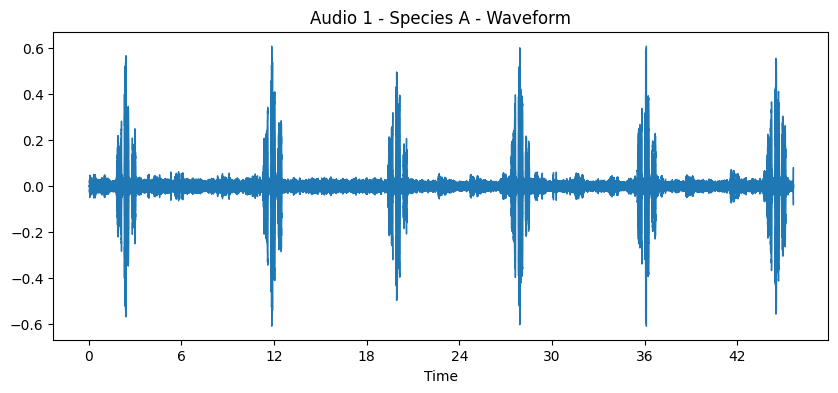

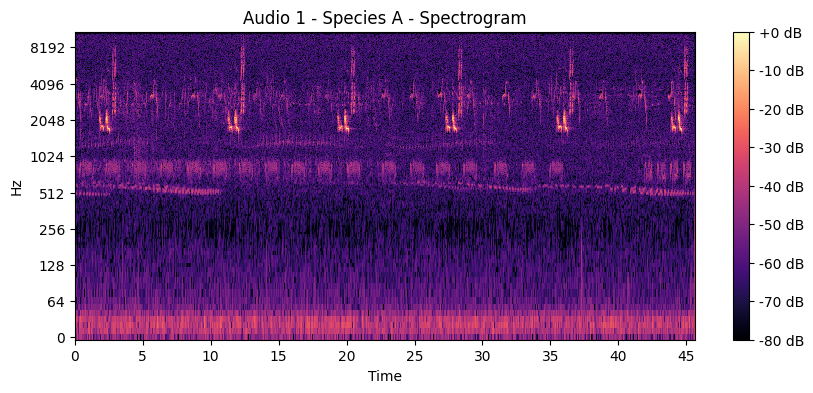

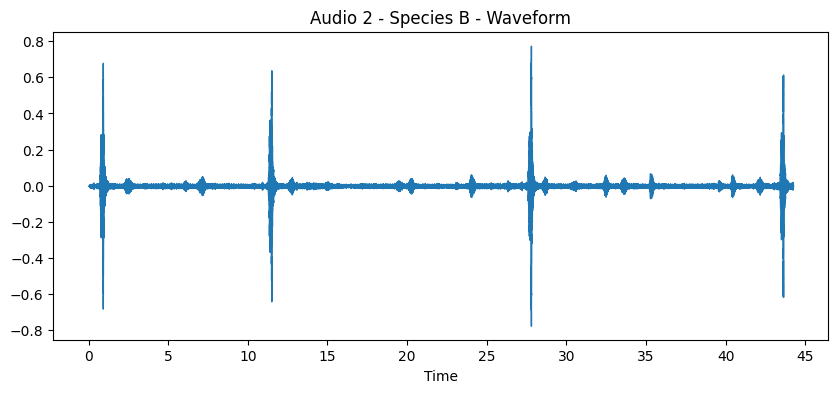

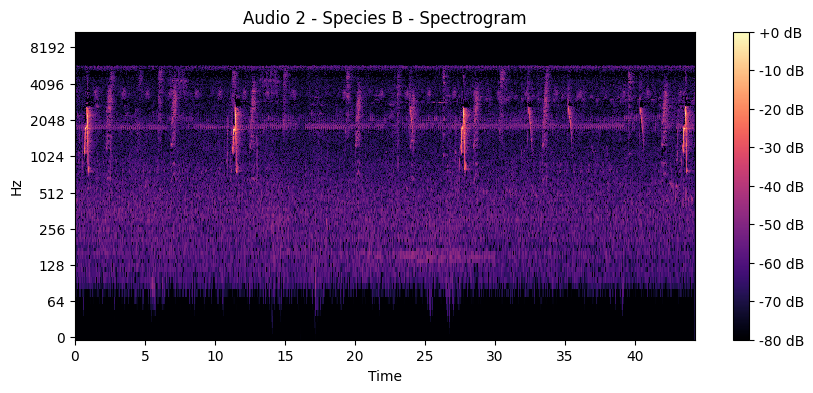

In [69]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob

import csv
import io

import ast
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import Audio

import matplotlib.pyplot as plt
from IPython.display import Audio

# Function to load and preprocess the audio file
def load_audio_file(file_path, resample_to=22050):
    audio, sr = librosa.load(file_path, sr=resample_to)
    return audio, sr

# Load sample audio files from two different species
audio_abe, sr_abe = load_audio_file("/content/bird/train_audio/abethr1/XC128013.ogg")
audio_abh, sr_abh = load_audio_file("/content/bird/train_audio/abhori1/XC127317.ogg")

# Play the audio
print("Audio 1:")
Audio(data=audio_abe, rate=sr_abe)

print("Audio 2:")
Audio(data=audio_abh, rate=sr_abh)

# Function to visualize waveforms and spectrograms
def visualize_audio(audio, sr, title=""):
    # Waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"{title} - Waveform")
    plt.show()

    # Spectrogram
    plt.figure(figsize=(10, 4))
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{title} - Spectrogram")
    plt.show()

# Visualize the audio files
visualize_audio(audio_abe, sr_abe, title="Audio 1 - Species A")
visualize_audio(audio_abh, sr_abh, title="Audio 2 - Species B")


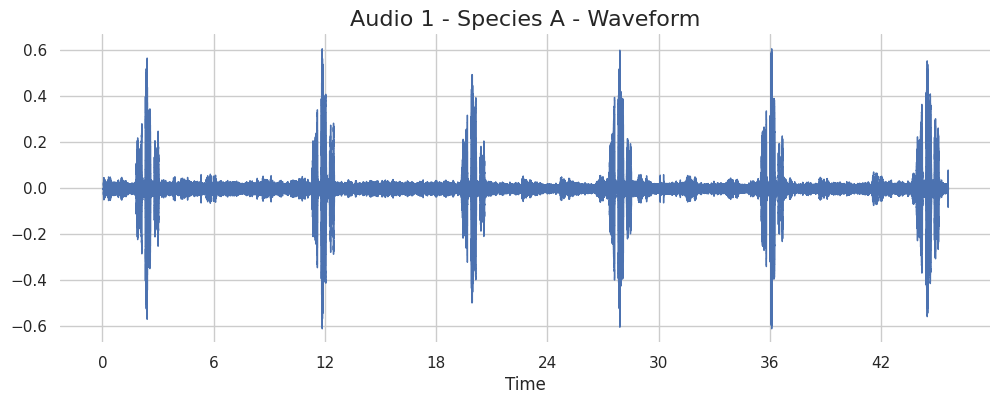

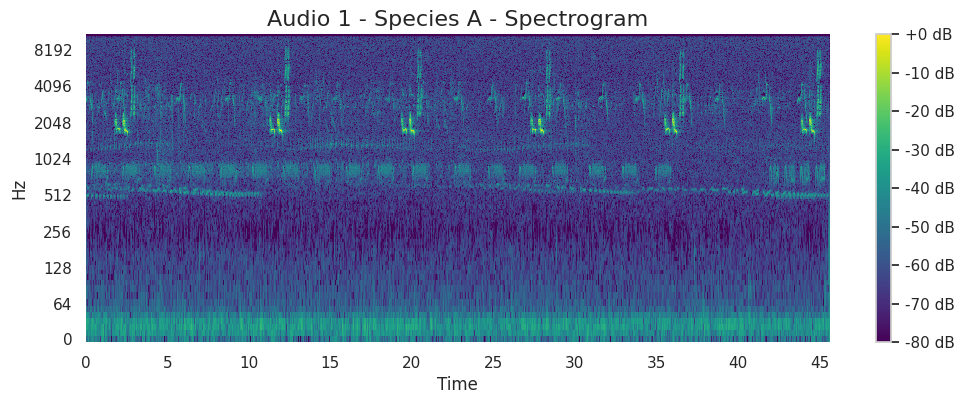

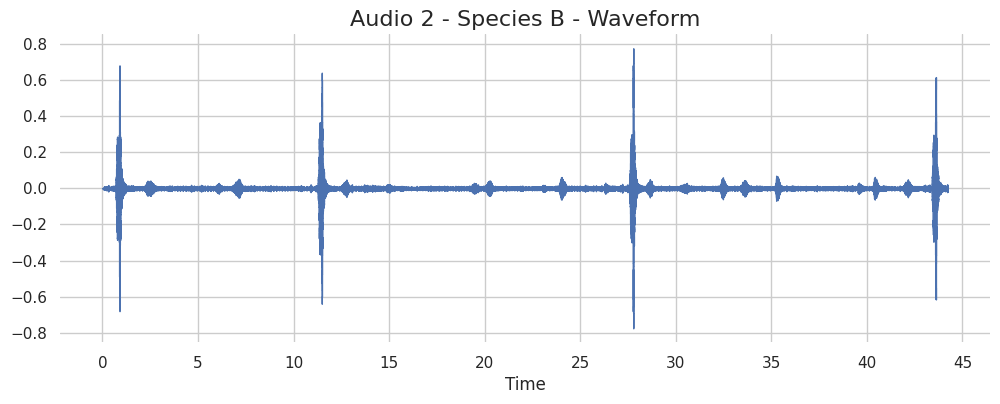

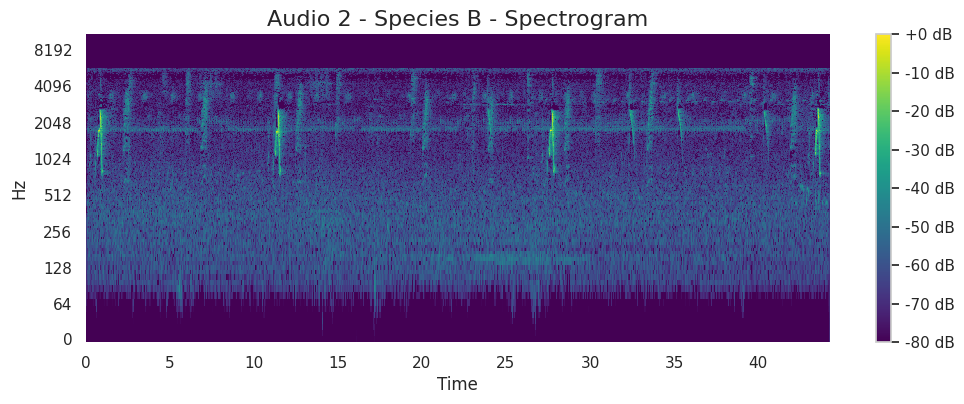

In [70]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Function to visualize waveforms and spectrograms
def visualize_audio(audio, sr, title="", cmap="viridis"):
    # Waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"{title} - Waveform", fontsize=16)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.show()

    # Spectrogram
    plt.figure(figsize=(12, 4))
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    img = librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log', cmap=cmap)
    plt.colorbar(img, format='%+2.0f dB')
    plt.title(f"{title} - Spectrogram", fontsize=16)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.show()

# Visualize the audio files
visualize_audio(audio_abe, sr_abe, title="Audio 1 - Species A")
visualize_audio(audio_abh, sr_abh, title="Audio 2 - Species B")

In [72]:
import pandas as pd

# Load the metadata file
metadata_path = "/content/bird/train_metadata.csv"
metadata = pd.read_csv(metadata_path)

# Get column names
column_names = metadata.columns

# Print column names
print("Column names:")
for col in column_names:
    print(col)

Column names:
primary_label
secondary_labels
type
latitude
longitude
scientific_name
common_name
author
license
rating
url
filename


In [73]:
import pandas as pd

# Load the metadata file
metadata_path = "/content/bird/train_metadata.csv"
metadata = pd.read_csv(metadata_path)

# Print the first few rows
print(metadata.head())

# Print summary statistics
print(metadata.describe())

# Print column names
print(metadata.columns)

  primary_label secondary_labels              type  latitude  longitude  \
0       abethr1               []          ['song']    4.3906    38.2788   
1       abethr1               []          ['call']   -2.9524    38.2921   
2       abethr1               []          ['song']   -2.9524    38.2921   
3       abethr1               []          ['song']   -2.9524    38.2921   
4       abethr1               []  ['call', 'song']   -2.9524    38.2921   

      scientific_name               common_name         author  \
0  Turdus tephronotus  African Bare-eyed Thrush  Rolf A. de By   
1  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
2  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
3  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
4  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   

                                             license  rating  \
0  Creative Commons Attribution-NonCommercial-Sha...     4.0   
1  Creative Commons Attr

In [74]:
# Count the number of unique species (primary labels)
unique_species = metadata["primary_label"].nunique()
print(f"There are {unique_species} unique species in the dataset.")

There are 264 unique species in the dataset.


Number of unique species: 264


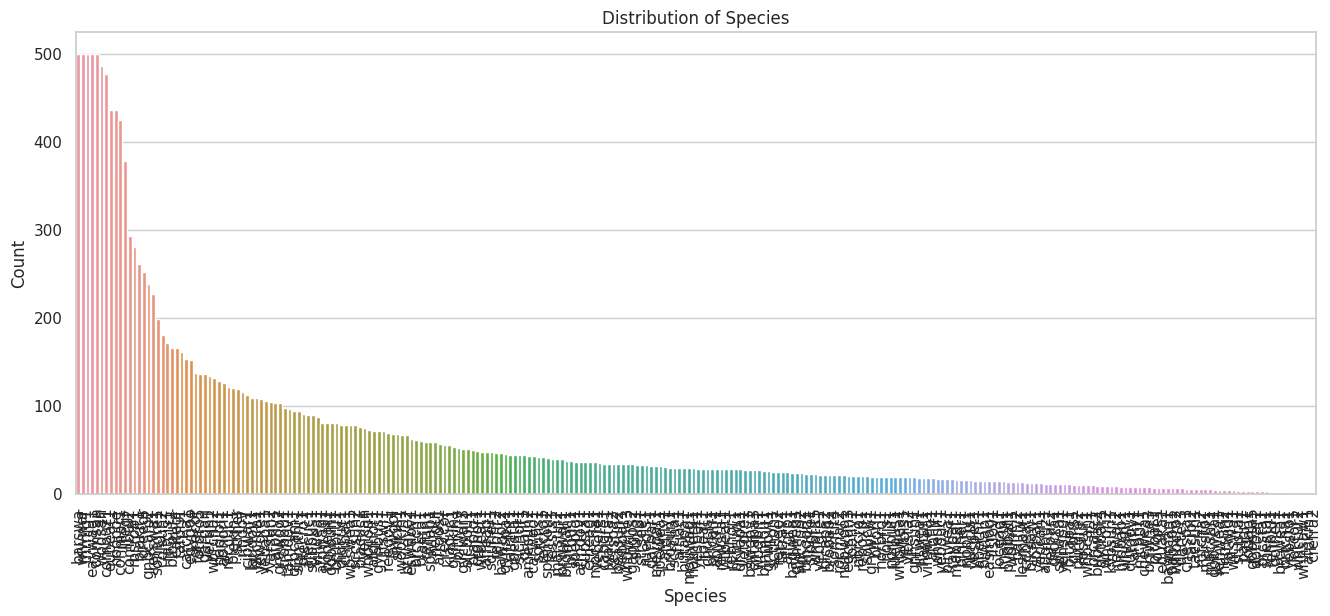

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metadata
metadata = pd.read_csv('/content/bird/train_metadata.csv')

# Unique species
print(f"Number of unique species: {metadata['primary_label'].nunique()}")

# Distribution of species
plt.figure(figsize=(16, 6))
sns.countplot(data=metadata, x='primary_label', order=metadata['primary_label'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Species')
plt.show()

In [77]:
import pandas as pd
import numpy as np

# Load the metadata
metadata = pd.read_csv('/content/bird/train_metadata.csv')

# Compute the counts per species
species_counts = metadata['primary_label'].value_counts()

# Convert the counts to a NumPy array
species_counts_array = np.array(species_counts)

# Print the counts per species as an array
print(species_counts_array)

[500 500 500 500 500 486 477 437 436 425 378 293 281 262 252 239 227 199
 181 172 166 166 161 153 152 138 137 136 134 132 129 126 122 121 119 116
 113 109 109 108 106 105 104 103  98  97  94  94  91  90  90  88  81  81
  81  81  79  79  78  78  76  75  73  72  72  72  70  68  68  67  67  63
  62  60  59  59  59  57  56  56  53  52  51  51  50  49  48  48  48  47
  47  46  45  45  45  44  43  43  42  42  41  40  40  40  38  38  37  37
  37  36  36  35  34  34  34  34  34  34  34  33  33  33  32  32  32  31
  30  30  30  30  30  30  29  29  29  29  28  28  28  28  28  28  27  27
  27  27  26  26  25  25  25  25  24  24  24  23  23  23  22  22  22  22
  22  22  21  21  21  21  21  20  20  20  20  20  19  19  19  19  19  18
  18  18  18  17  17  17  17  16  16  16  16  15  15  15  15  15  15  15
  14  14  14  14  13  13  13  13  12  12  12  12  12  11  10  10  10  10
  10   9   9   9   9   9   8   8   8   8   8   8   8   7   7   7   7   7
   7   7   6   6   6   6   6   6   5   5   5   5   

In [78]:
trainmeta_df = pd.read_csv("/content/bird/train_metadata.csv")
trainmeta_df.head()

primary_label secondary_labels              type  latitude  longitude  \
0       abethr1               []          ['song']    4.3906    38.2788   
1       abethr1               []          ['call']   -2.9524    38.2921   
2       abethr1               []          ['song']   -2.9524    38.2921   
3       abethr1               []          ['song']   -2.9524    38.2921   
4       abethr1               []  ['call', 'song']   -2.9524    38.2921   

      scientific_name               common_name         author  \
0  Turdus tephronotus  African Bare-eyed Thrush  Rolf A. de By   
1  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
2  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
3  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
4  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   

                                             license  rating  \
0  Creative Commons Attribution-NonCommercial-Sha...     4.0   
1  Creative Commons Attribution-NonCommercial-Sha...     3.5   
2  Creative Commons Attribution-NonCommercial-Sha...     3.5   
3  Creative Commons Attribution-NonCommercial-Sha...     5.0   
4  Creative Commons Attribution-NonCommercial-Sha...     4.5   

                                 url              filename  
0  https://www.xeno-canto.org/128013  abethr1/XC128013.ogg  
1  https://www.xeno-canto.org/363501  abethr1/XC363501.ogg  
2  https://www.xeno-canto.org/363502  abethr1/XC363502.ogg  
3  https://www.xeno-canto.org/363503  abethr1/XC363503.ogg  
4  https://www.xeno-canto.org/363504  abethr1/XC363504.ogg

In [79]:
x = trainmeta_df[trainmeta_df["primary_label"] == "afgfly1"]
x

primary_label                   secondary_labels  \
356       afgfly1                                 []   
357       afgfly1                                 []   
358       afgfly1                                 []   
359       afgfly1                                 []   
360       afgfly1  ['combul2', 'kerspa2', 'ratcis1']   
361       afgfly1                                 []   
362       afgfly1                                 []   
363       afgfly1                                 []   

                                      type  latitude  longitude  \
356                               ['song']   -7.5253    34.8521   
357                               ['call']    8.9200    40.0430   
358                               ['call']    8.9200    40.0430   
359                               ['call']   -1.5765    36.6316   
360         ['call,begging call,juvenile']   -2.8145    37.4113   
361     ['adult', 'call', 'sex uncertain']   -3.1481    36.6951   
362  ['call', 'juvenile', 'sex uncertain']   -3.1481    36.6951   
363     ['adult', 'call', 'sex uncertain']   -3.1481    36.6951   

             scientific_name              common_name            author  \
356  Bradornis microrhynchus  African Gray Flycatcher  Martin St-Michel   
357  Bradornis microrhynchus  African Gray Flycatcher    Andrew Spencer   
358  Bradornis microrhynchus  African Gray Flycatcher    Andrew Spencer   
359  Bradornis microrhynchus  African Gray Flycatcher     James Bradley   
360  Bradornis microrhynchus  African Gray Flycatcher        Rory Nefdt   
361  Bradornis microrhynchus  African Gray Flycatcher      isaac kilusu   
362  Bradornis microrhynchus  African Gray Flycatcher      isaac kilusu   
363  Bradornis microrhynchus  African Gray Flycatcher      isaac kilusu   

                                               license  rating  \
356  Creative Commons Attribution-NonCommercial-Sha...     3.0   
357  Creative Commons Attribution-NonCommercial-Sha...     5.0   
358  Creative Commons Attribution-NonCommercial-Sha...     5.0   
359  Creative Commons Attribution-NonCommercial-Sha...     5.0   
360  Creative Commons Attribution-NonCommercial-Sha...     3.5   
361  Creative Commons Attribution-NonCommercial-Sha...     4.0   
362  Creative Commons Attribution-NonCommercial-Sha...     5.0   
363  Creative Commons Attribution-NonCommercial-Sha...     5.0   

                                   url              filename  
356  https://www.xeno-canto.org/134487  afgfly1/XC134487.ogg  
357  https://www.xeno-canto.org/267773  afgfly1/XC267773.ogg  
358  https://www.xeno-canto.org/267774  afgfly1/XC267774.ogg  
359  https://www.xeno-canto.org/344741  afgfly1/XC344741.ogg  
360  https://www.xeno-canto.org/397762  afgfly1/XC397762.ogg  
361  https://www.xeno-canto.org/609474  afgfly1/XC609474.ogg  
362  https://www.xeno-canto.org/609492  afgfly1/XC609492.ogg  
363  https://www.xeno-canto.org/609493  afgfly1/XC609493.ogg

In [80]:
print(trainmeta_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16941 entries, 0 to 16940
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     16941 non-null  object 
 1   secondary_labels  16941 non-null  object 
 2   type              16941 non-null  object 
 3   latitude          16714 non-null  float64
 4   longitude         16714 non-null  float64
 5   scientific_name   16941 non-null  object 
 6   common_name       16941 non-null  object 
 7   author            16941 non-null  object 
 8   license           16941 non-null  object 
 9   rating            16941 non-null  float64
 10  url               16941 non-null  object 
 11  filename          16941 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.6+ MB
None


In [81]:
import pandas as pd

# Load the metadata file
metadata_path = "/content/bird/train_metadata.csv"
metadata = pd.read_csv(metadata_path)

# Get column names
column_names = metadata.columns

# Print column names
print("Column names:")
for col in column_names:
    print(col)

Column names:
primary_label
secondary_labels
type
latitude
longitude
scientific_name
common_name
author
license
rating
url
filename


barswa     500
wlwwar     500
thrnig1    500
eaywag1    500
comsan     500
          ... 
lotcor1      1
whctur2      1
whhsaw1      1
afpkin1      1
crefra2      1
Name: primary_label, Length: 264, dtype: int64


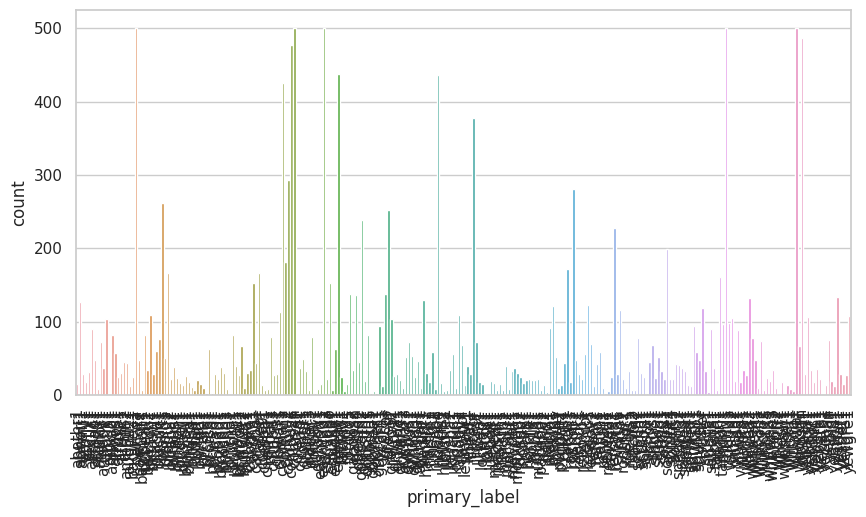

In [82]:
metadata_file = "/content/bird/train_metadata.csv"
metadata_df = pd.read_csv(metadata_file)

species_count = metadata_df['primary_label'].value_counts()
print(species_count)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='primary_label', data=metadata_df)
plt.xticks(rotation=90)
plt.show()

In [83]:
import ast
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load your metadata into trainmeta_df
trainmeta_df = pd.read_csv("/content/bird/train_metadata.csv")

# Distribution of Primary Labels (Bird Species)
fig = px.histogram(trainmeta_df, x="primary_label", nbins=len(trainmeta_df["primary_label"].unique()))

# Customize the appearance of the plot
fig.update_layout(
    title={
        'text': "Distribution of Primary Labels",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial'}
    },
    xaxis_title="Primary Labels",
    yaxis_title="Frequency",
    xaxis_tickangle=-45,
    xaxis_tickfont={'size': 12},
    yaxis_tickfont={'size': 12},
    legend_title="Primary Labels",
    legend_title_font={'size': 16},
    legend_font={'size': 14},
    plot_bgcolor='rgba(255, 255, 255, 1)',
    xaxis_showgrid=False,
    yaxis_showgrid=True,
    yaxis_gridwidth=1,
    yaxis_gridcolor='rgba(128, 128, 128, 0.2)',
    margin=dict(l=20, r=20, t=80, b=80),
)

fig.show()

# Geographical Distribution of Recordings
fig = px.scatter_geo(trainmeta_df,
                     lat="latitude",
                     lon="longitude",
                     color="primary_label",
                     title="Geographical Distribution of Recordings",
                     projection="natural earth")

fig.show()


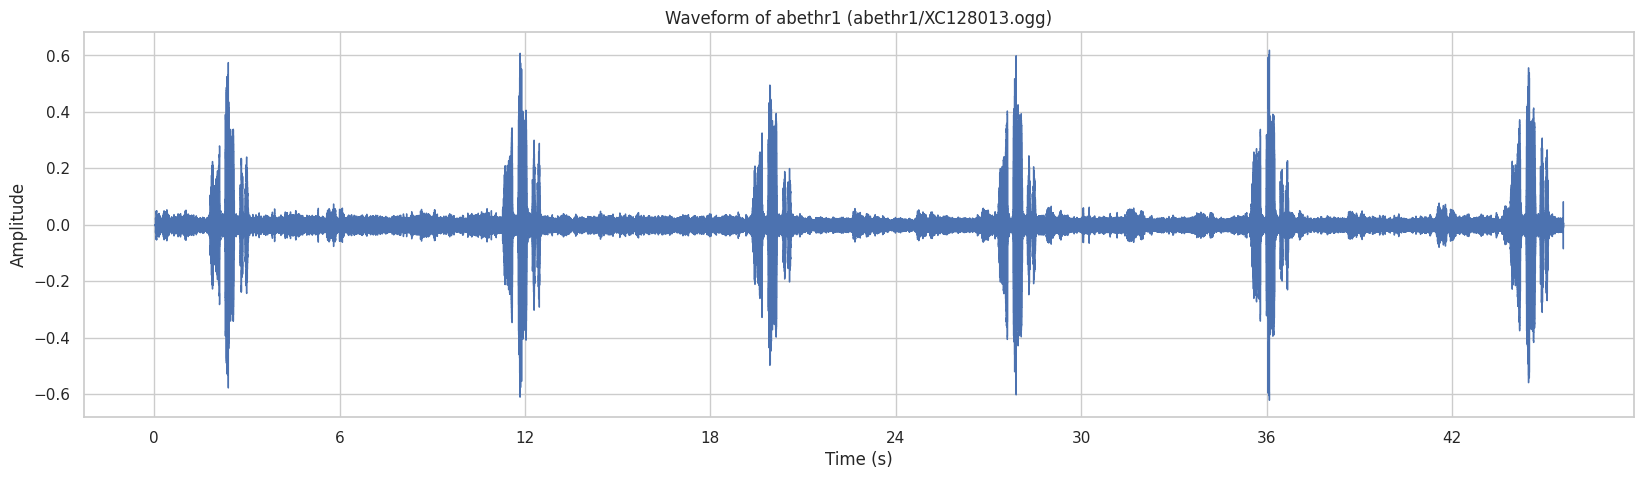

In [85]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read metadata file
metadata_path = "/content/bird/train_metadata.csv"
train_metadata = pd.read_csv(metadata_path)

# # Display some statistics
# print(train_metadata.describe())

# # Distribution of bird species
# species_count = train_metadata['primary_label'].value_counts()
# plt.figure(figsize=(20, 5))
# sns.barplot(x=species_count.index, y=species_count.values)
# plt.title('Distribution of Bird Species')
# plt.xlabel('Species')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

# Load an example audio file
bird_name = train_metadata['primary_label'].iloc[0]
example_audio_file = train_metadata[train_metadata['primary_label'] == bird_name]['filename'].iloc[0]
audio_path = f"/content/bird/train_audio/{example_audio_file}"

# Load audio with librosa
signal, sr = librosa.load(audio_path, sr=None)

# Display waveform
plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr)
plt.title(f'Waveform of {bird_name} ({example_audio_file})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [86]:
import os

# Set the path to the test audio files
train_audio_path = "/content/bird/train_audio"

# Loop through the test_audio folder and print the file names
for file in os.listdir(train_audio_path):
    if file.endswith(".ogg"):
        print(file)

In [87]:
import os

# Set the path to the test_audio files
test_audio_path = "/content/bird/train_audio"

# List all the folder names inside the test_audio folder
folder_names = [folder for folder in os.listdir(test_audio_path) if os.path.isdir(os.path.join(test_audio_path, folder))]

# Print the folder names
print(folder_names)

['dotbar1', 'bltori1', 'libeat1', 'vimwea1', 'marsun2', 'gycwar3', 'whrshr1', 'rehblu1', 'lawgol', 'supsta1', 'afpfly1', 'tafpri1', 'reccuc1', 'spfwea1', 'eaywag1', 'loceag1', 'gobbun1', 'meypar1', 'yewgre1', 'blwlap1', 'chucis1', 'afpkin1', 'woosan', 'whbcro2', 'pabspa1', 'gybfis1', 'macshr1', 'beasun2', 'afbfly1', 'blksaw1', 'gyhspa1', 'rbsrob1', 'sacibi2', 'tamdov1', 'blaplo1', 'trobou1', 'lotlap1', 'blacra1', 'cibwar1', 'darter3', 'raybar1', 'rebhor1', 'grewoo2', 'varsun2', 'squher1', 'reccor', 'abethr1', 'litswi1', 'afrgos1', 'rostur1', 'brtcha1', 'wlwwar', 'bkfruw1', 'palpri1', 'brobab1', 'slcbou1', 'helgui', 'blfbus1', 'bubwar2', 'ndcsun2', 'afrgrp1', 'refcro1', 'strher', 'shesta1', 'dutdov1', 'scthon1', 'nobfly1', 'bltapa1', 'brcale1', 'brubru1', 'hoopoe', 'blcapa2', 'fotdro5', 'thrnig1', 'nubwoo1', 'gobwea1', 'yesbar1', 'crheag1', 'spemou2', 'gbesta1', 'piecro1', 'gytbar1', 'hamerk1', 'laudov1', 'amesun2', 'afecuc1', 'blbpuf2', 'eubeat1', 'spfbar1', 'refbar2', 'sobfly1', 'tacs

In [88]:
import librosa
import numpy as np

def extract_features(audio_path, n_mfcc=13):
    # Load audio with librosa
    signal, sr = librosa.load(audio_path, sr=None)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

    # Extract Chroma features
    chroma_stft = librosa.feature.chroma_stft(y=signal, sr=sr)

    # Extract spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sr)

    # Extract tonnetz features
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(signal), sr=sr)

    # Calculate mean and standard deviation for each feature
    features = {
        'mfcc_mean': np.mean(mfccs, axis=1),
        'mfcc_std': np.std(mfccs, axis=1),
        'chroma_mean': np.mean(chroma_stft, axis=1),
        'chroma_std': np.std(chroma_stft, axis=1),
        'spectral_contrast_mean': np.mean(spectral_contrast, axis=1),
        'spectral_contrast_std': np.std(spectral_contrast, axis=1),
        'tonnetz_mean': np.mean(tonnetz, axis=1),
        'tonnetz_std': np.std(tonnetz, axis=1)
    }

    return features

# Example usage:
bird_name = train_metadata['primary_label'].iloc[0]
example_audio_file = train_metadata[train_metadata['primary_label'] == bird_name]['filename'].iloc[0]
audio_path = f"/content/bird/train_audio/{example_audio_file}"

features = extract_features(audio_path)
print(features)

{'mfcc_mean': array([-306.19138  ,    4.842829 ,  -13.787029 ,   -1.7346616,
          2.313297 ,   -5.210739 ,   -7.380139 ,   11.965574 ,
          5.949712 ,   15.32493  ,   14.205563 ,   18.220314 ,
          3.3921692], dtype=float32), 'mfcc_std': array([21.51588 , 12.69669 , 20.064205, 13.555822, 13.625337, 13.762436,
       10.303643, 12.225282, 10.564798, 13.000981,  9.709657, 10.082988,
        9.043387], dtype=float32), 'chroma_mean': array([0.35742402, 0.36994135, 0.31147155, 0.30745646, 0.33545962,
       0.40444207, 0.39092398, 0.45717734, 0.5539966 , 0.55012673,
       0.41966587, 0.29211178], dtype=float32), 'chroma_std': array([0.31311435, 0.3224061 , 0.29189083, 0.2863873 , 0.2892132 ,
       0.33570856, 0.30003667, 0.3025811 , 0.33266956, 0.32749003,
       0.29314932, 0.23939529], dtype=float32), 'spectral_contrast_mean': array([17.36752713, 10.38347203, 15.96152956, 16.12644785, 18.62020632,
       18.00357007, 57.35497038]), 'spectral_contrast_std': array([3.843211

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def extract_mfcc_features(audio_path, n_mfcc=13):
    signal, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs, axis=1)

def create_features_dataframe(metadata, audio_base_path):
    data = []

    for index, row in metadata.iterrows():
        bird_name = row['primary_label']
#         print(bird_name)
        audio_file = row['filename']
        
        audio_file = os.path.basename(audio_file)

#         print(audio_file)
        audio_path = os.path.join(audio_base_path, bird_name, audio_file)

        features = extract_mfcc_features(audio_path)
        data.append(np.append(features, bird_name))

    columns = [f"mfcc_{i}" for i in range(features.shape[0])] + ['primary_label']
    return pd.DataFrame(data, columns=columns)

metadata_path = "/content/bird/train_metadata.csv"
audio_base_path = "/content/bird/train_audio"
train_metadata = pd.read_csv(metadata_path)

features_df = create_features_dataframe(train_metadata, audio_base_path)

X = features_df.drop('primary_label', axis=1)
y = features_df['primary_label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.2f}")

print("Classification report:")
print(classification_report(y_val, y_pred))

In [ ]:
import librosa
import numpy as np

def extract_mel_spectrogram(audio_path, n_mels=128):
    signal, sr = librosa.load(audio_path, sr=None, mono=True)
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=n_mels)
    return librosa.power_to_db(mel_spectrogram, ref=np.max)

X = []
y = []

for index, row in train_metadata.iterrows():
    bird_name = row['primary_label']
    audio_file = row['filename']
    audio_path = f"/content/bird/train_audio/{audio_file}"
    
    mel_spectrogram = extract_mel_spectrogram(audio_path)
    X.append(mel_spectrogram)
    y.append(bird_name)

X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
input_shape = X_train.shape[1:]

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=20, verbose=1)

val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}")